# Part 1: Data Prep and Visualization in Python

In this project, we'll work through munging a data set and creating visualizations related to trends in the airline industry in the middle of the last century. You'll get started using [MatPlotLib](https://matplotlib.org/), a very powerful and popular plotting library in Python that is covered in this week's course materials.

In [1]:
# Install the pydataset package. This package gives us data sets to work with very easily
! pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=14779af8d18552b1c4c4192c32dce6ea4678340acf1388d08c326d97af6ac63b
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [2]:
# The convention for importing matplotlib with an alias is "plt". We'll also need pandas and numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## The Air Passengers Dataset

This dataset shows the number of passengers flying United States airlines by month from 1949-1960. Your job is to do various data munging operations on this dataset to clean it up and prepare it for several visualizations. You will then determine what code is needed to generate those visualizations.

In [3]:
from pydataset import data

passengers = data('AirPassengers')

initiated datasets repo at: /root/.pydataset/


Ugh. When we examine the head of this datset, we can see that the years are in decimal form rather than month and year. We'll need to change that before we can do our analysis.

NOTE: The times are represented by twelfths. i.e. 1949.00000 = 149 0/12 (January). 1949.083333 = 1949 1/12 (February), and so on.

In [4]:
passengers.head(12)

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


In [5]:
2/12

0.16666666666666666

## The decimal years complicate the EDA work

We need to deal with this by making explicit month and year columns. It is common to have to reformat columns like this in a dataframe

## #1 Add a 'year' column to passengers that reflects the current year

In [6]:
# TODO
passengers["year"] = passengers["time"].astype(str).str[:4].astype(int)
passengers[["time","year"]].head(5)

,time,year
1,1949.000000,1949
2,1949.083333,1949
3,1949.166667,1949
4,1949.250000,1949
5,1949.333333,1949


## #2 Add a "month" column

Set this up in such a way that January is represented with a 1, February with a 2, etc.

*Hint: Create a column in `passengers` with a 2-digit decimal equivalent (after the dot). This column will repeat values every 12 rows. If we know what month each value in this column maps to, can we get our desired `month` column via some dataframe operation using this column?*

In [7]:
# TODO

passengers[['Year2', 'Month']] = passengers['time'].astype(str).str.split('.').apply(pd.Series)
passengers['Year2'] = passengers['Year2'].astype(int)
passengers['Month'] = ('0.' + passengers['Month']).astype(float)
passengers['Month'] = passengers["Month"]*12 + 1
passengers[["time","Year2",'Month']].head(15)




,time,Year2,Month
1,1949.000000,1949,1.0
2,1949.083333,1949,2.0
3,1949.166667,1949,3.0
4,1949.250000,1949,4.0
5,1949.333333,1949,5.0
6,1949.416667,1949,6.0
7,1949.500000,1949,7.0
8,1949.583333,1949,8.0
9,1949.666667,1949,9.0
10,1949.750000,1949,10.0


## #3 Generate the plot below of passengers vs. time using each monthly count

<a href='https://drive.google.com/file/d/1PdaXbkCVzUXBnUP6c6cLP3nZ94ShSLg1/view?usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/7EHckqyjefS7rN8-gAtj2SgSyKfV3wlTnGKqCwzOf85F6NYlqYQbz7bDfWw=w2400' /></a>

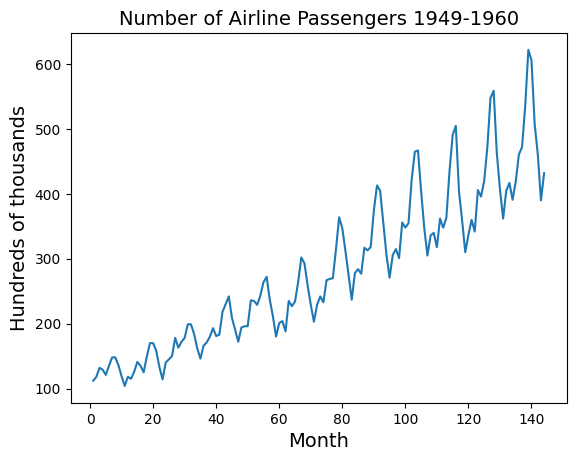

In [8]:
# TODO
passengers.head(5)
passengers["cum_month"] = (passengers["Year2"] - 1949)*12 + passengers["Month"]
passengers["cum_month"].head(15)

plt.plot(passengers["cum_month"], passengers["AirPassengers"])
plt.title('Number of Airline Passengers 1949-1960', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Hundreds of thousands', fontsize=14)
plt.show()

## #4 Generate the plot below of passengers vs. time using an annual count

<a href='https://drive.google.com/file/d/19WYHQR7sFgaeN5ZHlwx5x1-o-wxJ4weW/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh4.googleusercontent.com/2gbHNgm8UhbCEevaUBpMUSvVgk_6QuxMASqn9-wK1NdzrDXrcF-VIWK_o08=w2400' /></a>

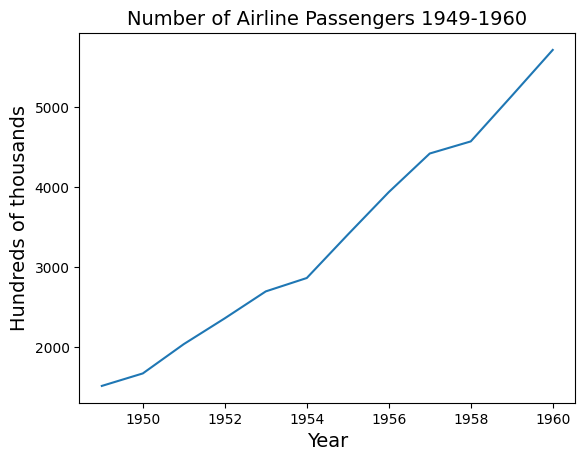

In [9]:
# TODO

passengers[["AirPassengers"]].groupby(passengers["Year2"]).sum()

passengers.groupby('Year2')['AirPassengers'].sum().plot(legend=False)
plt.title('Number of Airline Passengers 1949-1960', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Hundreds of thousands', fontsize=14)
plt.show()

## #5 Generate the barplot below of passengers by year

<a href='https://drive.google.com/file/d/1-4NF40zvVhwi6RWagJu98BaBuDNOXaEd/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/IQRk35KApDIxYtHGH3WoczLnCvHCRdMNlHw64rgLWPYUostOoAn2hxp8lZA=w2400' /></a>

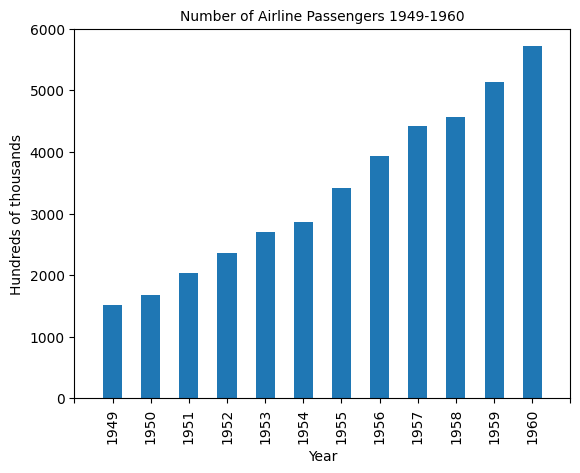

In [10]:
# TODO
passengers.groupby('Year2')['AirPassengers'].sum().plot(kind = 'bar')
plt.title('Number of Airline Passengers 1949-1960', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylim(0,6000)
listOf_Xticks = np.arange(-1, 13, 1)
plt.xticks(listOf_Xticks)
plt.ylabel('Hundreds of thousands', fontsize=10)
plt.show()


## #6 Generate the histogram below of monthly passengers

**Additional requirements:**

* Only include 1955 and beyond
* Use a binwidth of 50, a min of 200, and a max of 700
* Set the yticks to start at 0, end at 25 by interval of 5

<a href='https://drive.google.com/file/d/1mEtvUbnh2LcDDc73LNr_qX984HzgyhiQ/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh6.googleusercontent.com/7I2FzRPSQPyoalFcwH3vTDeB9Gf80OUlaZOs1x9oRRYyQLlHXPU9H-NhSVQ=w2400' /></a>

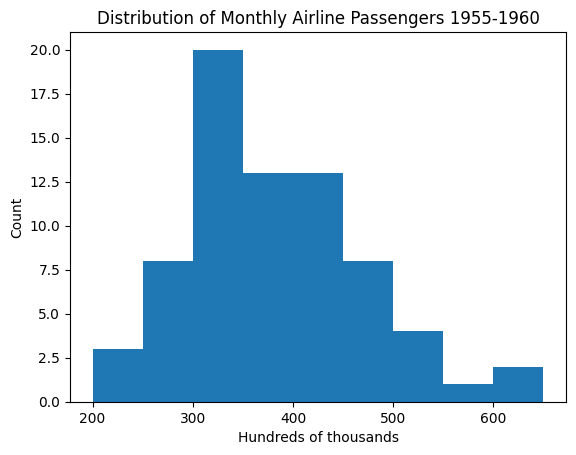

In [11]:
# TODO

passengers2 = passengers[["Month","Year2", "AirPassengers"]].loc[passengers["Year2"]>=1955]


plt.hist(passengers2["AirPassengers"], bins=np.arange(200, 700, 50) )
plt.yticks = np.arange(0, 25, 5)
plt.xlabel("Hundreds of thousands")
plt.ylabel("Count")
plt.title('Distribution of Monthly Airline Passengers 1955-1960')

plt.show()


## #7 Generate the histogram below of monthly passengers

**Additional requirements:**

* Generate two groups to compare. Group 1 should be the years 1949-1950. Group 2 should be the years 1959-60.
* Binwidth of 50 from 100 to 700
* yticks from 0 to 24, spaced by 2
* Be sure to include a legend

<a href='https://drive.google.com/file/d/1gqJbBVOPIurYikUIDpXoAF3gZx2p8lUA/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/Ok91nFY8Srjn1FpVwOil9ycH9y6isZejTqi7hifqaEA5E3tWpkwldWVLo3U=w2400' /></a>

Text(0.5, 1.0, 'Airline Passengers distribution beginning and ending of decade')

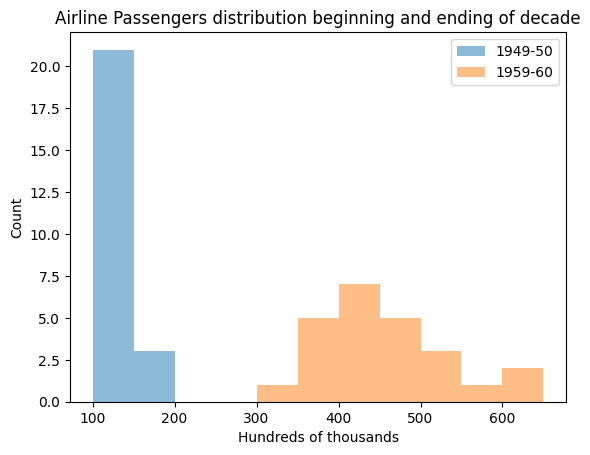

In [12]:
# TODO

passengers2 = passengers[["Month","Year2", "AirPassengers"]].loc[passengers["Year2"].isin([1949,1950,1959,1960])]

def grouping(v):
  if v <= 1950 :
    return "1949-50"
  elif v >= 1959 :
    return "1959-60"
  else:
    return "Mid"

passengers2["group"] = passengers2["Year2"].apply(lambda v : grouping(v))

passengers2.head(5)

groups = passengers2.groupby('group')
for name, group in groups:
    plt.hist(group['AirPassengers'], bins=np.arange(100, 700, 50), label=name, alpha = 0.5)
plt.legend()
plt.xlabel("Hundreds of thousands")
plt.ylabel("Count")
plt.yticks = np.arange(0, 24, 2)
plt.title('Airline Passengers distribution beginning and ending of decade')

## #8 Generate the time plot below

**Additional requirements:**

* Compare 1950, 1955, and 1960 by month

<a href='https://drive.google.com/file/d/11nVH5EiYxxtJ48isS9VLtwLIjn0hALXV/view?usp=sharing&amp;usp=embed_facebook&source=ctrlq.org'><img src='https://lh3.googleusercontent.com/SKfWqBE324A__VS8V-TBqMQXHWE9OUjVoJyeyJME8uJzyfWS73aaCms7A3c=w2400' /></a>

Text(0.5, 1.0, 'Airline Passengers by month: beginning, mid, end of decade')

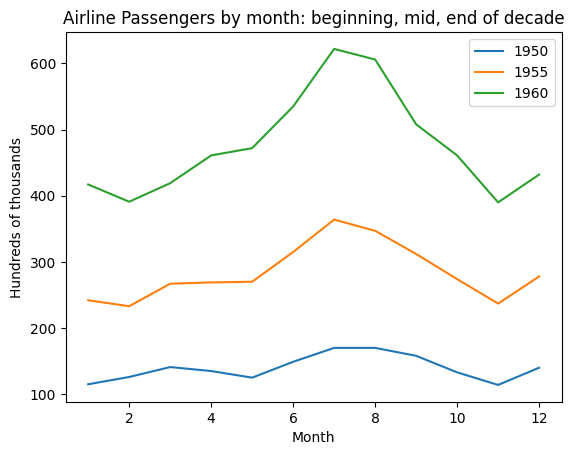

In [13]:
# TODO

passengers3 = passengers[["Month","Year2", "AirPassengers"]].loc[passengers["Year2"].isin([1950,1955,1960])]
groups = passengers3.groupby('Year2')
for name, group in groups:
   plt.plot(group["Month"], group["AirPassengers"], label = name)
#passengers3.groupby('Year2')['AirPassengers'].plot(legend=True)
plt.legend()
plt.xlabel("Month")
plt.ylabel("Hundreds of thousands")
plt.yticks = np.arange(0, 24, 2)
plt.title('Airline Passengers by month: beginning, mid, end of decade')


## #9  Understand your data and tell a story

* Which of these plots would you create first to explore your data before building a model or performing an analysis? Why?
* If you could only use one of these plots to tell a story about air travel trends mid-centry, which would you use and why? What are some insights you could share?


In [14]:
# TODO
# The cum_month graph at the very beginning is a very helpful view to see what the overall data is tell;
# however the last graph really puts it into persepective.  It should the increase YoY, but also that the spike in the summer months is becoming very more significant

# Part 2: Data Scaling and Normalization
Above shows some fundamental transformations that are useful techniques while working with data. There are other transformation techniques that are crucial to some data science algorithms. We will go over data scaling and normalization. This [Kaggle Tutorial](https://www.kaggle.com/code/alexisbcook/scaling-and-normalization/tutorial) is a good reference that discusses these methods at a high level.

To recap, **data scaling** is a way to limit numerical values within a specified range. This is a necessary pre-preprocessing step to some algorithms, expecially neural networks.

**Data normalization** is a way to change the distribution of numerical values. From this [Medium article](https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070), "models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal."

In [15]:
# Package imports

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [16]:
# Load dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)

In [17]:
# Take a look at the data

dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [18]:
# Summarize the shape of the dataset (rows, columns)

dataset.shape

(208, 61)

In [19]:
# Summarize each variable
# We can see that for each column, the min max is not consistent

dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<ipython-input-20-abf52a12cb94>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax = ax)


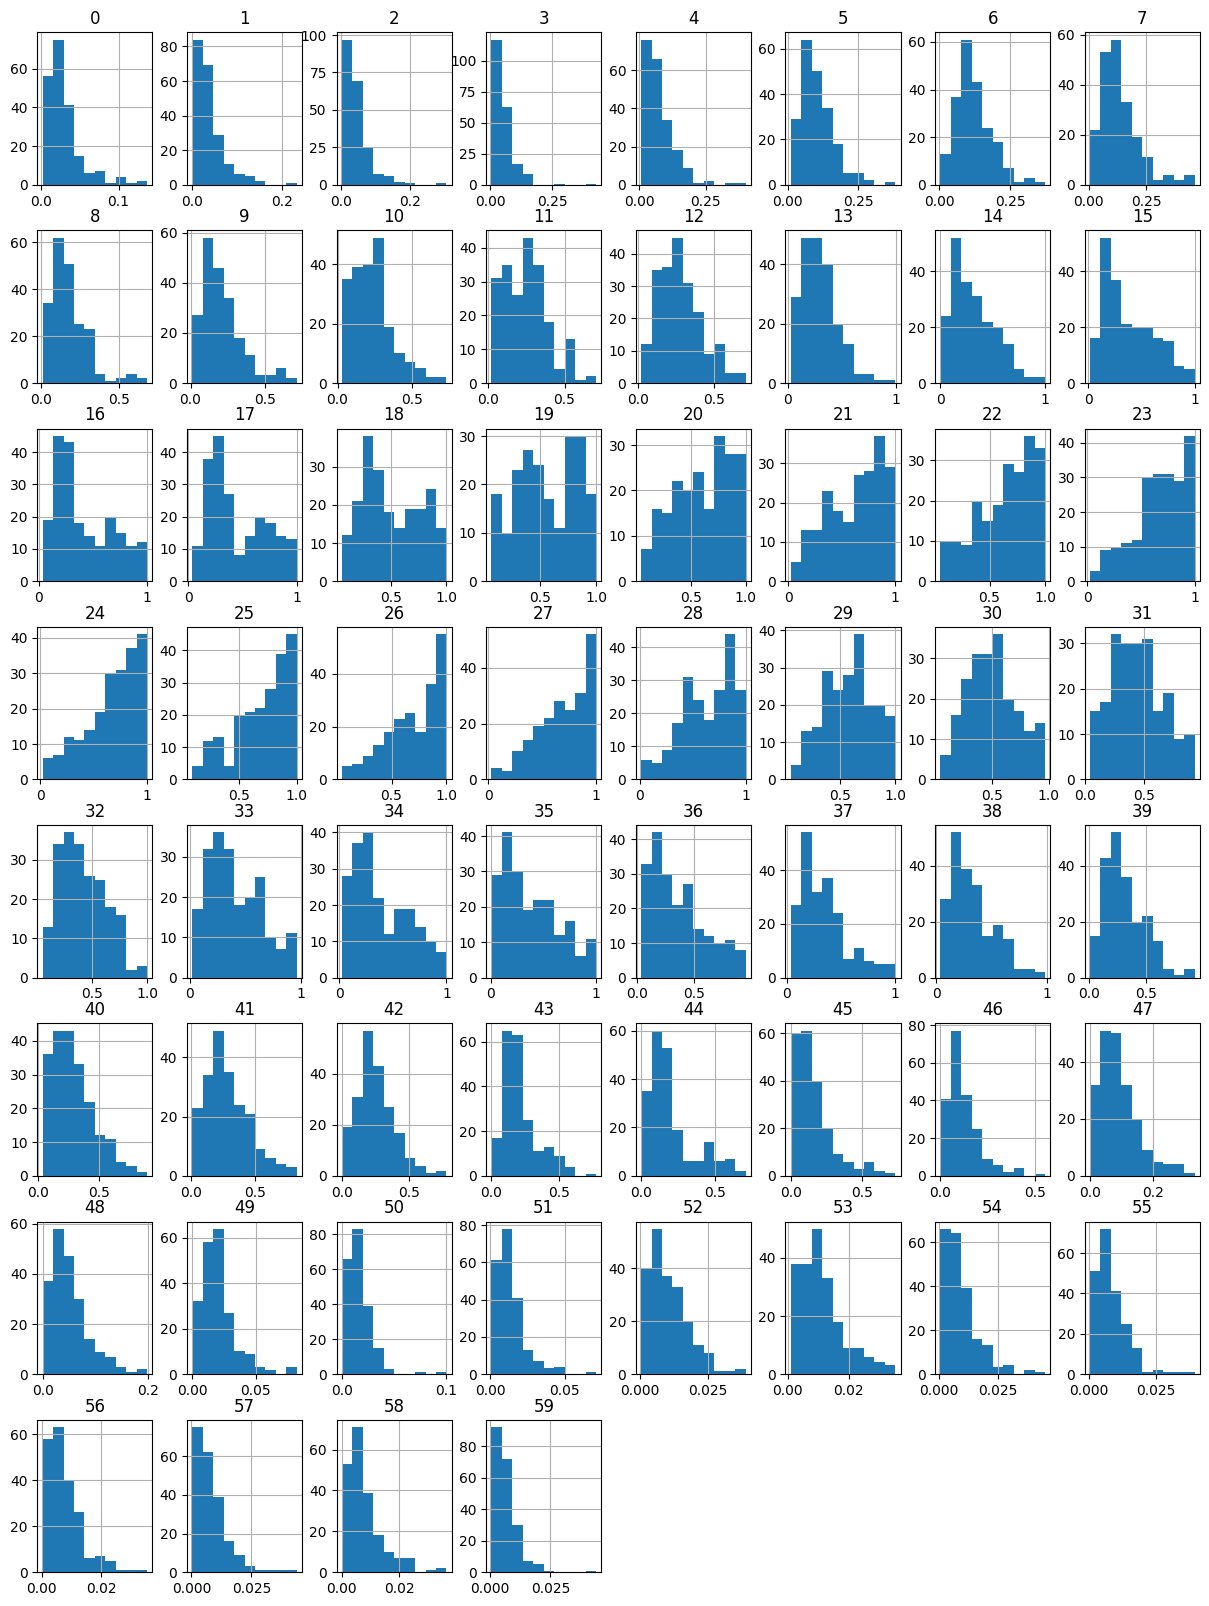

In [20]:
# Histograms of the columns

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset.hist(ax = ax)
pyplot.show()

## Prepare dataset for Scaling
We will change the scale of features to be from zero to one. To do this we will use **min max scaling**, with its formulation found [here](https://en.wikipedia.org/wiki/Feature_scaling#:~:text=Also%20known%20as%20min%2Dmax,the%20nature%20of%20the%20data.). If you are interested in doing this yourself without a package, please do so. That will be provided in the solutions as well.

### #10 Remove the target feature so we only have the numerical columns.
Make sure it is a pandas data frame and is named X

In [21]:
# TO DO

dataset.dtypes
X = dataset.drop([60], axis=1)
X.shape

(208, 60)

In [22]:
# Use min max scalar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)

# Transform the test test
X_scaled = scaler.transform(X)

In [23]:
# The scaled data is returned as a nump array, change to pandas df

X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.136431,0.156451,0.135677,0.035426,0.224956,0.237571,0.407468,0.340904,0.449282,0.285714,...,0.231076,0.027104,0.155844,0.435673,0.149660,0.417949,0.502841,0.185355,0.245179,0.060046
1,0.323009,0.221603,0.272011,0.150024,0.283033,0.666756,0.574405,0.755458,0.483045,0.394537,...,0.124502,0.108417,0.218182,0.111111,0.199546,0.479487,0.389205,0.105263,0.140496,0.087760
2,0.182153,0.246892,0.356110,0.243699,0.230028,0.585327,0.648810,0.819405,0.817859,0.869584,...,0.032869,0.319544,0.418182,0.248538,0.394558,0.615385,0.889205,0.368421,0.258953,0.166282
3,0.062684,0.070724,0.199737,0.034950,0.034999,0.071486,0.288149,0.269239,0.077447,0.164593,...,0.240040,0.161198,0.080519,0.409357,0.179138,0.176923,0.133523,0.093822,0.107438,0.256351
4,0.550885,0.282898,0.153088,0.079886,0.132640,0.147003,0.318182,0.531863,0.516659,0.621479,...,0.155378,0.032810,0.127273,0.277778,0.235828,0.028205,0.196023,0.102975,0.292011,0.203233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.126844,0.145735,0.050263,0.028293,0.082678,0.410642,0.539773,0.361411,0.333629,0.367653,...,0.202191,0.154066,0.241558,0.552632,0.061224,0.248718,0.176136,0.256293,0.528926,0.348730
204,0.227139,0.040720,0.092970,0.120304,0.175755,0.230046,0.258929,0.212348,0.141419,0.291863,...,0.050797,0.075606,0.228571,0.365497,0.129252,0.151282,0.088068,0.066362,0.168044,0.140878
205,0.373894,0.184741,0.054205,0.055635,0.072026,0.287288,0.331169,0.247630,0.175181,0.345488,...,0.154382,0.216833,0.062338,0.119883,0.126984,0.217949,0.389205,0.308924,0.209366,0.057737
206,0.212389,0.148736,0.156045,0.130766,0.025361,0.336469,0.387446,0.235502,0.276914,0.320463,...,0.041833,0.111270,0.106494,0.339181,0.068027,0.079487,0.088068,0.173913,0.096419,0.096998


<ipython-input-24-c5bc80950411>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_scaled.hist(ax = ax)


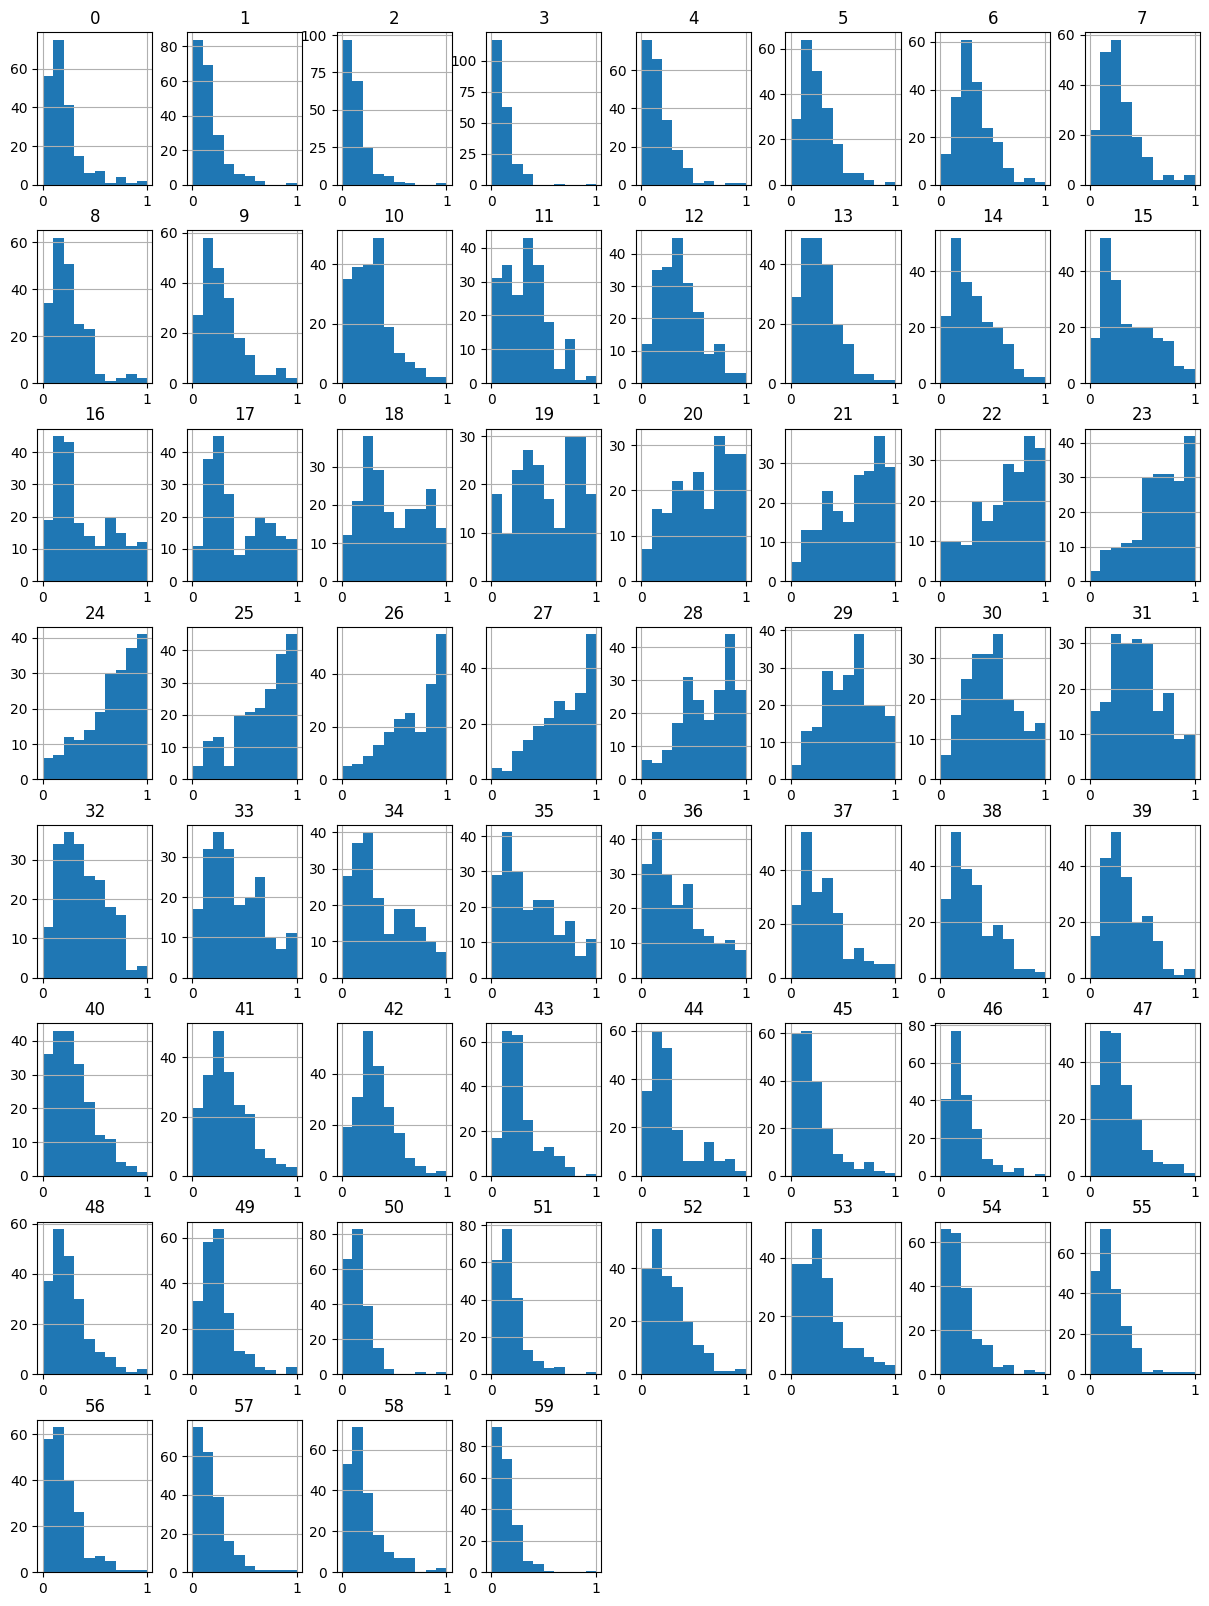

In [24]:
# Lets take a look at the distribution of each column, it hasn't changed!
# The only thing that has changed is the range of values, theyre all between zero and one

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_scaled.hist(ax = ax)
pyplot.show()

## Using data scaling to normalize our data set.
We will be using the box-cox method of normalizing our data. A reference to how this is derived can be found [here](https://www.statisticshowto.com/box-cox-transformation/), however, the details are NOT necessary to know.

In [25]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(X)

ValueError: ignored

## The above errored :(
  This is because our data has zeros in it! We can solve for this by using the min max scalar, except for having a range from zero and one, we can make the range what we decide to make the data is strictly positive!

### #11 Re run the data scaling so instead of the range being from zero to one, change it so that it is strictly positive. (Zero is not positive)

In [26]:
# TODO
scaler = MinMaxScaler(feature_range=(1,2))
scaler.fit(X)
X_scaled = scaler.transform(X)



### #12 Fit the new transformer to the updated scaled data set

In [27]:
# TODO
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(X_scaled)

### #13 Plot a histogram for each column and compare the results from the originally loaded data set

<ipython-input-28-0046f550dc81>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Y_scaled.hist(ax = ax)


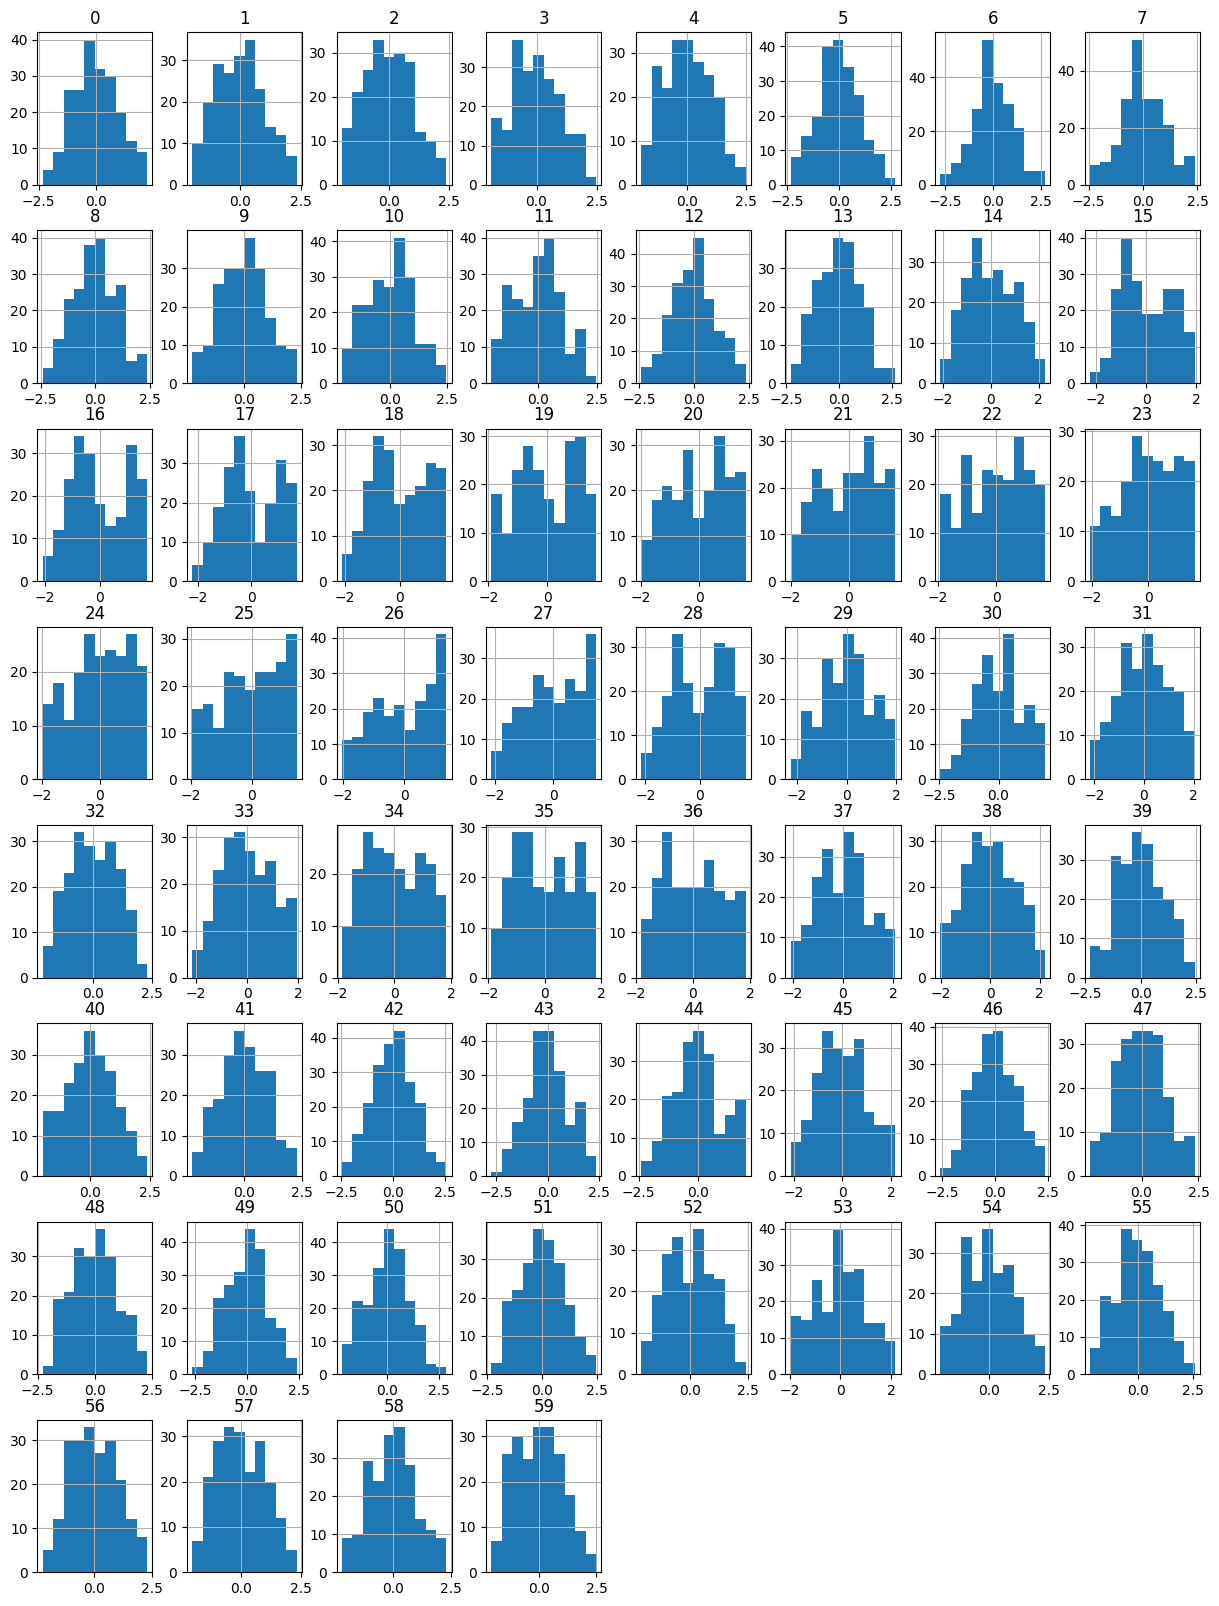

In [28]:
# TODO
Y_scaled = pd.DataFrame(data)
Y_scaled


fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Y_scaled.hist(ax = ax)
pyplot.show()